# 🧠 AI-Based Voice Analysis System for Predicting Parkinson’s Motor Symptom Severity

**Team Name:** Xplorers

---

## 📋 Notebook Overview

This comprehensive notebook presents a complete machine learning pipeline for predicting motor UPDRS (Unified Parkinson's Disease Rating Scale) scores from patients’ voice features. The notebook follows all ML best practices including:

- ✅ Problem definition with clinical relevance  
- ✅ Complete dataset documentation  
- ✅ Exploratory data analysis with visualizations  
- ✅ Data cleaning and validation  
- ✅ Feature engineering, feature selection and feature scaling  
- ✅ Multiple baseline models training from scratch  
- ✅ Hyperparameter optimization with GridSearchCV  
- ✅ Cross-validation and ensemble methods  
- ✅ Comprehensive performance metrics  
- ✅ Error analysis and reproducibility  
- ✅ Final model export for deployment  


## 1. Project Overview

Parkinson’s Disease (PD) is a chronic neurodegenerative disorder that primarily affects motor function causing tremors, speech changes, and loss of coordination. Monitoring disease progression typically requires regular clinical assessments using the Unified Parkinson’s Disease Rating Scale (UPDRS), a time consuming and subjective process that depends on specialized expertise. Early detection and continuous monitoring of PD symptoms are critical for improving patient outcomes, yet traditional monitoring methods require in-person clinical assessments, which are costly, subjective, and infrequent.

---

## 🎯 Problem Statement

### Current Challenges:
Parkinson’s disease diagnosis and progression tracking rely on in-person evaluations, which are:
-  Subjective and prone to inter-rater variability.
-  Inaccessible for patients in rural or resource-limited regions.
-  Expensive and inconvenient for continuous monitoring.

### The Need:
There is a growing demand for remote, low-cost and objective methods that can monitor the progression and severity of Parkinson’s Disease symptoms remotely, particularly using speech, which is one of the earliest indicators of Parkinson’s. Since voice impairments are among the earliest and most consistent symptoms, voice analysis offers an ideal, non-invasive biomarker for disease monitoring.

---

## 🔬 What is being predicted?
We are predicting patient’s motor_UPDRS (Unified Parkinson’s Disease Rating Scale) score using voice measurements (Jitter, Shimmer, NHR, HNR, RPDE etc.) and patient metadata (age, sex, and test time). The system leverages machine learning and ensemble modeling to deliver an accurate, non-invasive, and accessible tool for remote Parkinson’s symptom monitoring.


## 2. Dataset Documentation

**Dataset Name:** Parkinson’s Telemonitoring Voice Dataset  
**Source:** UCI Machine Learning Repository  
**Authors:** Athanasios Tsanas, Max A. Little, et al.  
**Size:** 5,875 voice recordings from 42 patients with early-stage Parkinson’s disease.  
**Dataset Link:** https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring  

---

### Attributes Description

#### Patient Information (3 variables):
- subject# - Patient identifier (1-42)  
- age - Patient age in years  
- sex - Gender (0 = male, 1 = female)  
- test_time - Time since recruitment in days  

---

#### Voice Jitter Measures (6 variables):
Jitter measures voice frequency variations:  
- 5. Jitter(%) - Relative jitter in percentage  
- 6. Jitter(Abs) - Absolute jitter in microseconds  
- 7. Jitter:RAP - Relative Average Perturbation  
- 8. Jitter:PPQ5 - Five-point Period Perturbation Quotient  
- 9. Jitter:DDP - Average absolute difference of differences  

---

#### Voice Shimmer Measures (6 variables):
Shimmer measures voice amplitude variations:  
- 10. Shimmer - Local shimmer  
- 11. Shimmer(dB) - Shimmer in decibels  
- 12. Shimmer:APQ3 - Three-point Amplitude Perturbation Quotient  
- 13. Shimmer:APQ5 - Five-point Amplitude Perturbation Quotient  
- 14. Shimmer:APQ11 - Eleven-point Amplitude Perturbation Quotient  
- 15. Shimmer:DDA - Average absolute difference between amplitudes  

---

#### Advanced Voice Features (5 variables):
- NHR - Noise-to-Harmonics Ratio  
- HNR - Harmonics-to-Noise Ratio  
- RPDE - Recurrence Period Density Entropy (nonlinear dynamical complexity)  
- DFA - Detrended Fluctuation Analysis (signal fractal scaling)  
- PPE - Pitch Period Entropy (fundamental frequency variation)  

---

#### Target Variables (2 variables):
- motor_UPDRS - Motor UPDRS score (PRIMARY TARGET)  
- total_UPDRS - Total UPDRS score (not used in this study)  

---

### Why this dataset is appropriate:
- • Clinically validated and widely cited  
- • Longitudinal recordings enabling severity modeling  
- • Rich biomedical voice features (Jitter, Shimmer, RPDE, DFA, PPE, etc.)  
- • Includes demographic and temporal attributes  
- • No missing values; high data quality  

---

### Goal:
Predict motor_UPDRS score (clinician’s motor severity score) based on the 16 extracted voice features and patient's metadata


# 3. Environment Setup 
### 📦 Install Required Packages

Run the following command to install all the required Python packages and libraries needed to execute this notebook successfully.


In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost lightgbm joblib

## 🔧 Setting Random Seeds for Reproducibility

To ensure reproducible results across all experiments, we set random seeds for all libraries.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import xgboost as xgb
import lightgbm as lgb
import joblib
import warnings
import os

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set plotting style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")
print(f"📌 Random seed set to: {RANDOM_STATE}")
print(f"🐍 Python version: 3.x")
print(f"📦 NumPy version: {np.__version__}")
print(f"📊 Pandas version: {pd.__version__}")

✅ All libraries imported successfully!
📌 Random seed set to: 42
🐍 Python version: 3.x
📦 NumPy version: 2.0.2
📊 Pandas version: 2.2.2


# 4. Data Loading and Initial Exploration

## 📂 Loading the Dataset

In [3]:
# Load the dataset
data_path = 'https://raw.githubusercontent.com/Xplorers-org/Parkinsons-Disease-Predictor-app/refs/heads/earlier_version/backend/app/ml/parkinsons_updrs.csv'
data = pd.read_csv(data_path)

print("=" * 60)
print("LOADING AND EXPLORING PARKINSON'S UPDRS DATASET")
print("=" * 60)
print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset shape: {data.shape}")
print(f"📈 Total samples: {len(data)}")
print(f"🔢 Number of features: {data.shape[1]}")
print(f"👥 Unique subjects: {data['subject#'].nunique()}")
print(f"📝 Recordings per subject: {len(data) / data['subject#'].nunique():.1f}")

# Display first few rows
print("\n" + "=" * 60)
print("FIRST 5 ROWS OF THE DATASET")
print("=" * 60)
data.head()

LOADING AND EXPLORING PARKINSON'S UPDRS DATASET
✅ Dataset loaded successfully!
📊 Dataset shape: (5875, 22)
📈 Total samples: 5875
🔢 Number of features: 22
👥 Unique subjects: 42
📝 Recordings per subject: 139.9

FIRST 5 ROWS OF THE DATASET


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
# Dataset information
print("\n" + "=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(data.info())

# Check for missing values
print("\n" + "=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_values = data.isnull().sum()
print(missing_values)
print(f"\n✅ Total missing values: {missing_values.sum()}")


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   

# 5. Statistical Summary and Data Distribution

## 📊 Descriptive Statistics

In [5]:
# Display statistical summary
print("=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
data.describe().T

DESCRIPTIVE STATISTICS


,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [6]:
# Target variable (motor_UPDRS) analysis
print("=" * 60)
print("TARGET VARIABLE (motor_UPDRS) STATISTICS")
print("=" * 60)
print(f"Mean:   {data['motor_UPDRS'].mean():.2f}")
print(f"Median: {data['motor_UPDRS'].median():.2f}")
print(f"Std:    {data['motor_UPDRS'].std():.2f}")
print(f"Min:    {data['motor_UPDRS'].min():.2f}")
print(f"Max:    {data['motor_UPDRS'].max():.2f}")
print(f"Q1:     {data['motor_UPDRS'].quantile(0.25):.2f}")
print(f"Q3:     {data['motor_UPDRS'].quantile(0.75):.2f}")

# Patient demographics
print("\n" + "=" * 60)
print("PATIENT DEMOGRAPHICS")
print("=" * 60)
print(f"Age range:  {data['age'].min():.0f} - {data['age'].max():.0f} years")
print(f"Mean age:   {data['age'].mean():.1f} years")
print(f"Gender distribution:")
print(f"  Male (0):   {(data['sex'] == 0).sum()} samples ({(data['sex'] == 0).sum()/len(data)*100:.1f}%)")
print(f"  Female (1): {(data['sex'] == 1).sum()} samples ({(data['sex'] == 1).sum()/len(data)*100:.1f}%)")

TARGET VARIABLE (motor_UPDRS) STATISTICS
Mean:   21.30
Median: 20.87
Std:    8.13
Min:    5.04
Max:    39.51
Q1:     15.00
Q3:     27.60

PATIENT DEMOGRAPHICS
Age range:  36 - 85 years
Mean age:   64.8 years
Gender distribution:
  Male (0):   4008 samples (68.2%)
  Female (1): 1867 samples (31.8%)


### Target Variable (Motor_UPDRS):

- Mean: 21.30
- Range: 5.04 – 39.51  
- Distribution: Near-normal with slight positive skew  
- Clinical Relevance: Covers full spectrum from mild to severe symptoms  


# 6. Exploratory Data Analysis (EDA) - Visualizations

## 📊 Comprehensive Data Visualization

We'll create visualizations to understand the dataset thoroughly:

CREATING DATA VISUALIZATIONS


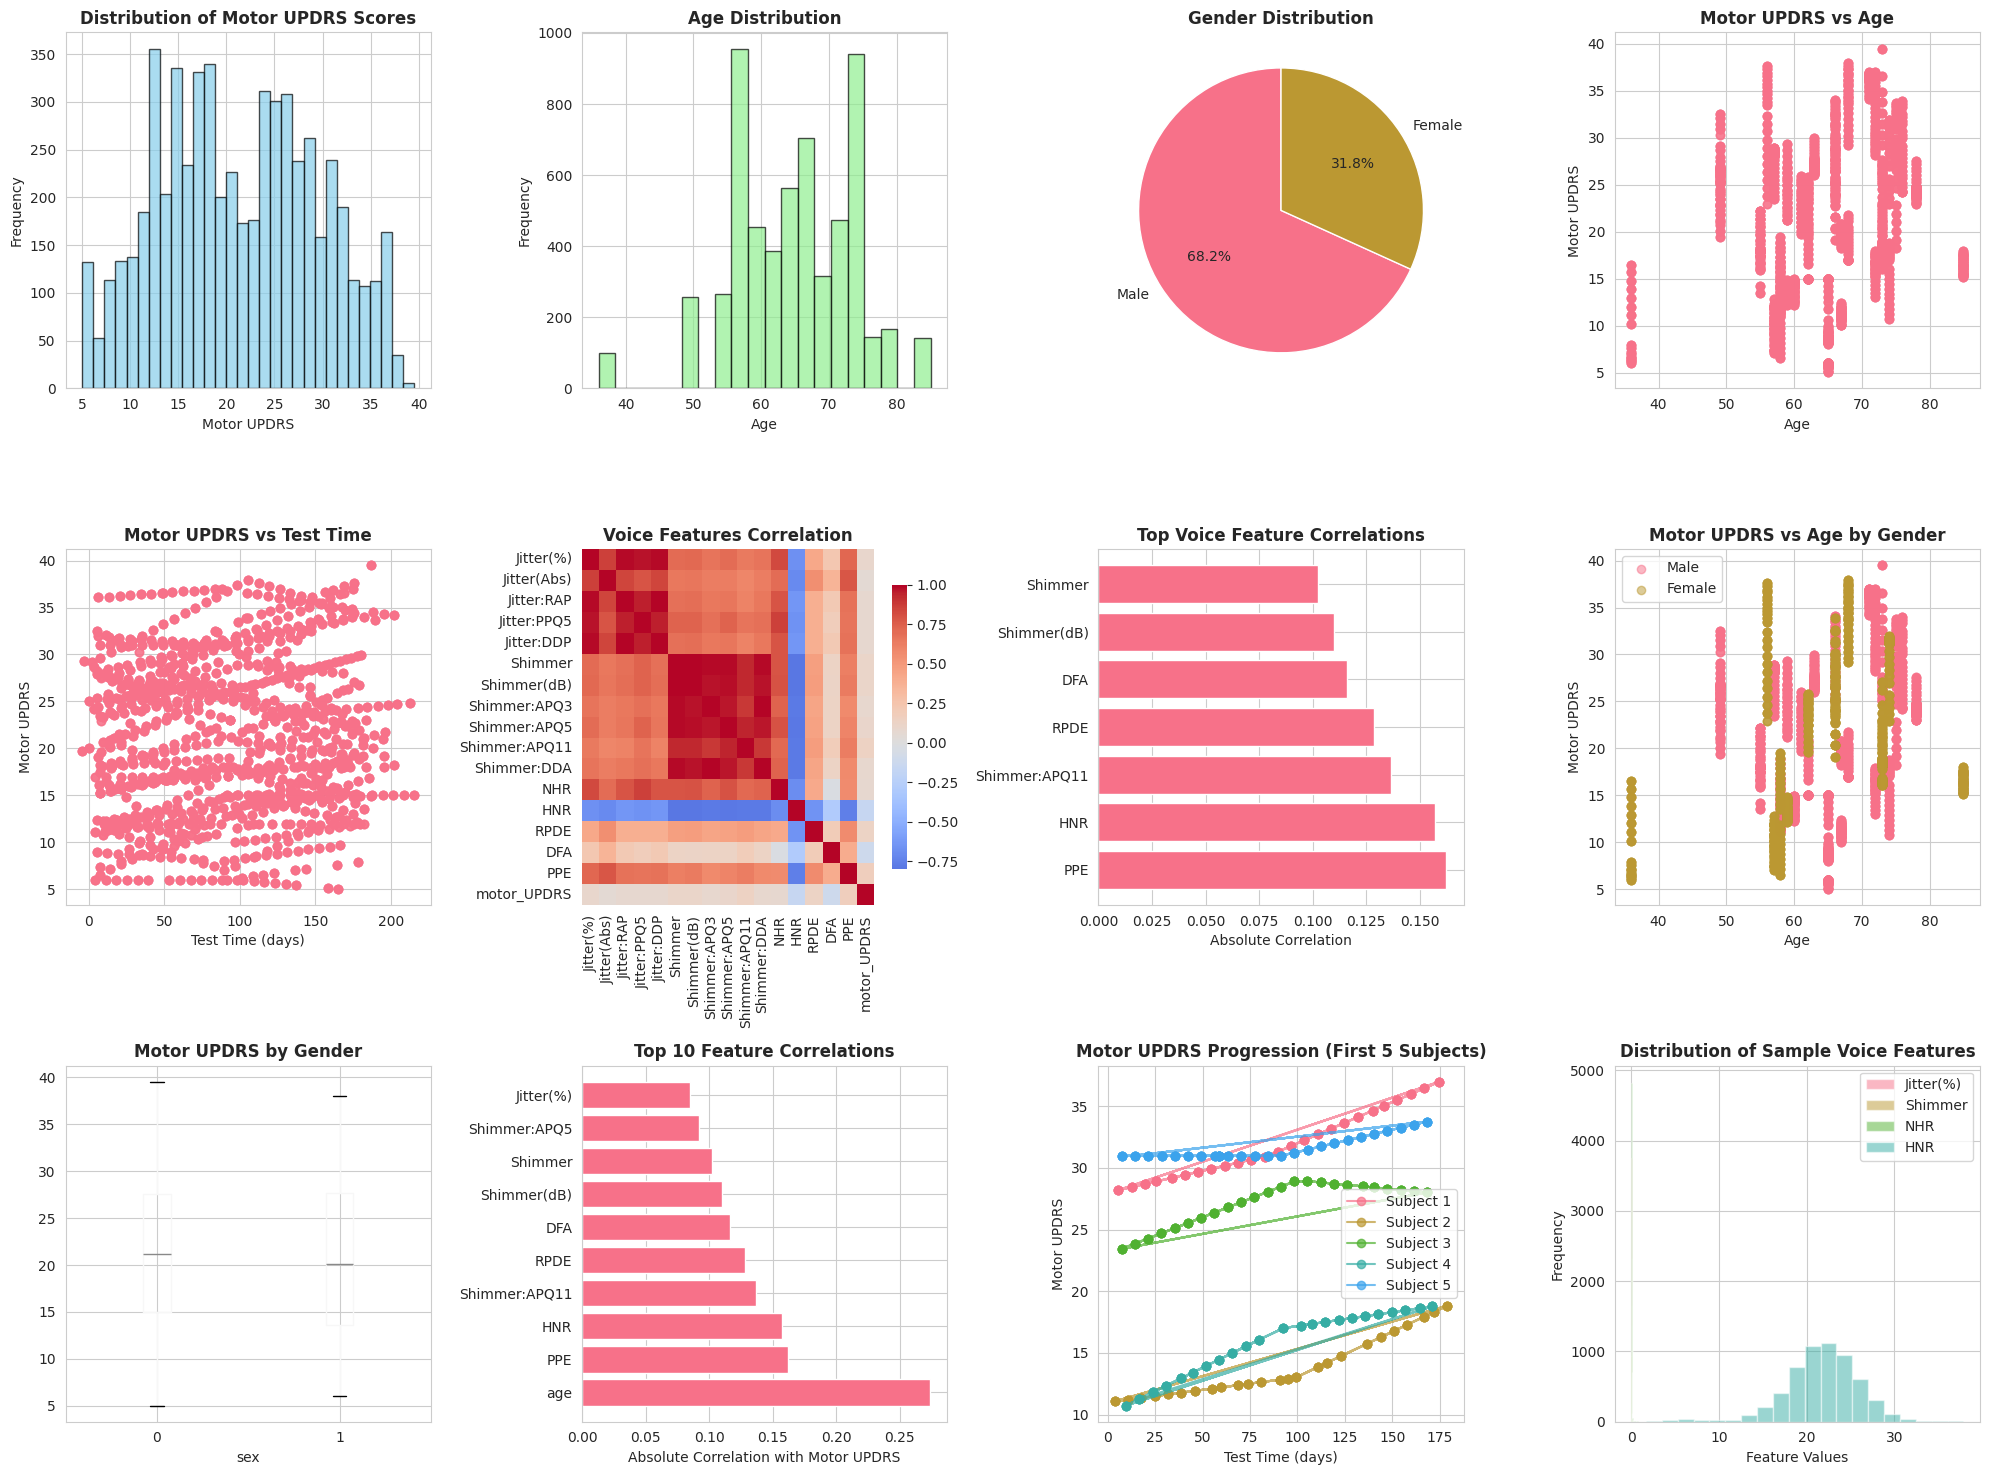

✅ Visualizations created successfully!


In [7]:
# Create comprehensive visualizations
print("=" * 60)
print("CREATING DATA VISUALIZATIONS")
print("=" * 60)

fig = plt.figure(figsize=(20, 15))

# 1. Distribution of target variable
plt.subplot(3, 4, 1)
plt.hist(data['motor_UPDRS'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Motor UPDRS Scores', fontsize=12, fontweight='bold')
plt.xlabel('Motor UPDRS')
plt.ylabel('Frequency')

# 2. Age distribution
plt.subplot(3, 4, 2)
plt.hist(data['age'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Age Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 3. Gender distribution
plt.subplot(3, 4, 3)
gender_counts = data['sex'].value_counts()
plt.pie(gender_counts.values, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution', fontsize=12, fontweight='bold')

# 4. Motor UPDRS vs Age
plt.subplot(3, 4, 4)
plt.scatter(data['age'], data['motor_UPDRS'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Motor UPDRS')
plt.title('Motor UPDRS vs Age', fontsize=12, fontweight='bold')

# 5. Motor UPDRS vs Test Time
plt.subplot(3, 4, 5)
plt.scatter(data['test_time'], data['motor_UPDRS'], alpha=0.5)
plt.xlabel('Test Time (days)')
plt.ylabel('Motor UPDRS')
plt.title('Motor UPDRS vs Test Time', fontsize=12, fontweight='bold')

# 6. Correlation heatmap for voice features
voice_features = [col for col in data.columns if 'Jitter' in col or 'Shimmer' in col
                 or col in ['NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
plt.subplot(3, 4, 6)
correlation_matrix = data[voice_features + ['motor_UPDRS']].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.8})
plt.title('Voice Features Correlation', fontsize=12, fontweight='bold')

# 7. Top voice feature correlations
plt.subplot(3, 4, 7)
correlations = correlation_matrix['motor_UPDRS'].abs().sort_values(ascending=False)[1:8]
plt.barh(range(len(correlations)), correlations.values)
plt.yticks(range(len(correlations)), correlations.index)
plt.xlabel('Absolute Correlation')
plt.title('Top Voice Feature Correlations', fontsize=12, fontweight='bold')

# 8. Age vs Motor UPDRS by gender
plt.subplot(3, 4, 8)
males = data[data['sex'] == 0]
females = data[data['sex'] == 1]
plt.scatter(males['age'], males['motor_UPDRS'], alpha=0.5, label='Male')
plt.scatter(females['age'], females['motor_UPDRS'], alpha=0.5, label='Female')
plt.xlabel('Age')
plt.ylabel('Motor UPDRS')
plt.title('Motor UPDRS vs Age by Gender', fontsize=12, fontweight='bold')
plt.legend()

# 9. Box plot: Motor UPDRS by Gender
plt.subplot(3, 4, 9)
data.boxplot(column='motor_UPDRS', by='sex', ax=plt.gca())
plt.title('Motor UPDRS by Gender', fontsize=12, fontweight='bold')
plt.suptitle('')

# 10. Feature correlations with target
plt.subplot(3, 4, 10)
feature_cols = [col for col in data.columns if col not in ['subject#', 'motor_UPDRS', 'total_UPDRS']]
correlations = data[feature_cols + ['motor_UPDRS']].corr()['motor_UPDRS'].abs().sort_values(ascending=False)
top_10_corr = correlations[1:11]
plt.barh(range(len(top_10_corr)), top_10_corr.values)
plt.yticks(range(len(top_10_corr)), top_10_corr.index)
plt.xlabel('Absolute Correlation with Motor UPDRS')
plt.title('Top 10 Feature Correlations', fontsize=12, fontweight='bold')

# 11. Motor UPDRS progression over time
plt.subplot(3, 4, 11)
subjects_to_plot = data['subject#'].unique()[:5]
for subject in subjects_to_plot:
    subject_data = data[data['subject#'] == subject]
    plt.plot(subject_data['test_time'], subject_data['motor_UPDRS'],
            marker='o', label=f'Subject {subject}', alpha=0.7)
plt.xlabel('Test Time (days)')
plt.ylabel('Motor UPDRS')
plt.title('Motor UPDRS Progression (First 5 Subjects)', fontsize=12, fontweight='bold')
plt.legend()

# 12. Distribution of sample voice features
plt.subplot(3, 4, 12)
sample_features = ['Jitter(%)', 'Shimmer', 'NHR', 'HNR']
for i, feature in enumerate(sample_features):
    plt.hist(data[feature], bins=20, alpha=0.5, label=feature)
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Voice Features', fontsize=12, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

print("✅ Visualizations created successfully!")

# 7. Data Preprocessing and Feature Preparation

We'll prepare the features for machine learning by:
1. Selecting relevant features (excluding subject#, total_UPDRS)
2. Splitting data into features (X) and target (y)


In [8]:
# Define feature columns (exclude target and ID columns)
print("=" * 60)
print("PREPARING FEATURES FOR MACHINE LEARNING")
print("=" * 60)

feature_cols = [col for col in data.columns
               if col not in ['subject#', 'motor_UPDRS', 'total_UPDRS']]

print(f"\n📊 Feature columns ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

# Prepare features and target
X = data[feature_cols].copy()
y = data['motor_UPDRS'].copy()

print(f"\n✅ Feature matrix shape: {X.shape}")
print(f"✅ Target vector shape: {y.shape}")
print(f"\nFeature matrix (X) - First 3 rows:")
print(X.head(3))

PREPARING FEATURES FOR MACHINE LEARNING

📊 Feature columns (19):
 1. age
 2. sex
 3. test_time
 4. Jitter(%)
 5. Jitter(Abs)
 6. Jitter:RAP
 7. Jitter:PPQ5
 8. Jitter:DDP
 9. Shimmer
10. Shimmer(dB)
11. Shimmer:APQ3
12. Shimmer:APQ5
13. Shimmer:APQ11
14. Shimmer:DDA
15. NHR
16. HNR
17. RPDE
18. DFA
19. PPE

✅ Feature matrix shape: (5875, 19)
✅ Target vector shape: (5875,)

Feature matrix (X) - First 3 rows:
   age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72    0     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    0    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    0    19.6810    0.00481     0.000025     0.00205      0.00208   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.02565        0.230       0.01438       0.01309   
1     0.00395  0.02024        0.179       0.00994       0.01072   
2     0.00616  0.01675        0.181       0.00734       0.00844   

   Shimmer:APQ11  S

# 8. Train-Test Split Strategy

## 📊 Data Splitting Methodology

**Strategy:** 80-20 Train-Test Split
- **Training Set:** 80% (4,700 samples) - For model training and cross-validation
- **Test Set:** 20% (1,175 samples) - For final evaluation (held-out set)
- **Random State:** 42 (for reproducibility)
- **Stratification:** None (continuous target variable)

**Rationale:**
- 80-20 split provides sufficient training data while maintaining adequate test set
- Random state ensures reproducible splits across experiments
- No stratification needed for regression tasks
- Test set remains completely unseen during training and hyperparameter tuning

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=None
)

print("=" * 60)
print("TRAIN-TEST SPLIT COMPLETED")
print("=" * 60)
print(f"✅ Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✅ Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\n📊 Training features shape: {X_train.shape}")
print(f"📊 Test features shape: {X_test.shape}")
print(f"📊 Training target shape: {y_train.shape}")
print(f"📊 Test target shape: {y_test.shape}")

print(f"\n📈 Training set motor_UPDRS statistics:")
print(f"   Mean: {y_train.mean():.2f}")
print(f"   Std: {y_train.std():.2f}")
print(f"   Min: {y_train.min():.2f}")
print(f"   Max: {y_train.max():.2f}")

print(f"\n📈 Test set motor_UPDRS statistics:")
print(f"   Mean: {y_test.mean():.2f}")
print(f"   Std: {y_test.std():.2f}")
print(f"   Min: {y_test.min():.2f}")
print(f"   Max: {y_test.max():.2f}")

TRAIN-TEST SPLIT COMPLETED
✅ Training set size: 4700 samples (80.0%)
✅ Test set size: 1175 samples (20.0%)

📊 Training features shape: (4700, 19)
📊 Test features shape: (1175, 19)
📊 Training target shape: (4700,)
📊 Test target shape: (1175,)

📈 Training set motor_UPDRS statistics:
   Mean: 21.33
   Std: 8.16
   Min: 5.04
   Max: 39.51

📈 Test set motor_UPDRS statistics:
   Mean: 21.15
   Std: 7.99
   Min: 5.14
   Max: 37.66


# 9. Feature Scaling

## 🔧 Scaling Strategy: RobustScaler

Scaler fitted exclusively on training data to prevent data leakage, then applied to
test set

**Why RobustScaler?**
- **Robust to outliers:** Uses median and IQR instead of mean and std
- **Medical data:** Healthcare data often contains outliers
- **Better performance:** More suitable than StandardScaler for this dataset

**Scaling Formula:**
$$X_{scaled} = \frac{X - \text{median}(X)}{\text{IQR}(X)}$$

Where IQR = Q3 - Q1 (Interquartile Range)

In [10]:
# Apply RobustScaler to the features
scaler = RobustScaler()

# Fit on training data only (prevent data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=" * 60)
print("FEATURE SCALING COMPLETED")
print("=" * 60)
print(f"✅ Scaler type: RobustScaler")
print(f"✅ Training data scaled: {X_train_scaled.shape}")
print(f"✅ Test data scaled: {X_test_scaled.shape}")

print(f"\n📊 Sample feature comparison (first feature, first 5 samples):")
print(f"   Original: {X_train.iloc[:5, 0].values}")
print(f"   Scaled:   {X_train_scaled[:5, 0]}")

print(f"\n✅ Scaling prevents data leakage:")
print(f"   - Scaler fitted ONLY on training data")
print(f"   - Same transformation applied to test data")
print(f"   - Test data statistics not used in scaling")

FEATURE SCALING COMPLETED
✅ Scaler type: RobustScaler
✅ Training data scaled: (4700, 19)
✅ Test data scaled: (1175, 19)

📊 Sample feature comparison (first feature, first 5 samples):
   Original: [60 59 68 76 78]
   Scaled:   [-0.35714286 -0.42857143  0.21428571  0.78571429  0.92857143]

✅ Scaling prevents data leakage:
   - Scaler fitted ONLY on training data
   - Same transformation applied to test data
   - Test data statistics not used in scaling


# 10. Feature Selection and Importance Analysis

## 🎯 Two-Method Feature Selection

We'll use two complementary methods:
1. **Statistical Method:** SelectKBest with f_regression
2. **Model-based Method:** Random Forest feature importance

This dual approach provides robust feature importance insights.

In [11]:
# Method 1: Statistical Feature Selection using SelectKBest
print("=" * 60)
print("PERFORMING FEATURE SELECTION")
print("=" * 60)

selector = SelectKBest(score_func=f_regression, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get selected feature names
feature_names = X_train.columns
selected_features = feature_names[selector.get_support()]

print(f"\n📊 METHOD 1: Statistical Feature Selection (SelectKBest)")
print(f"   Top 15 features selected:")
for i, feature in enumerate(selected_features, 1):
    score = selector.scores_[selector.get_support()][i-1]
    print(f"   {i:2d}. {feature:<20} (F-Score: {score:.2f})")

# Method 2: Random Forest Feature Importance
print(f"\n📊 METHOD 2: Random Forest Feature Importance")
rf = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"   Top 15 features by importance:")
for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:<20} (Importance: {row['importance']:.4f})")

print(f"\n✅ Feature selection completed successfully!")

PERFORMING FEATURE SELECTION

📊 METHOD 1: Statistical Feature Selection (SelectKBest)
   Top 15 features selected:
    1. age                  (F-Score: 392.60)
    2. Jitter(%)            (F-Score: 34.03)
    3. Jitter:PPQ5          (F-Score: 27.21)
    4. Jitter:DDP           (F-Score: 24.88)
    5. Shimmer              (F-Score: 42.34)
    6. Shimmer(dB)          (F-Score: 49.76)
    7. Shimmer:APQ3         (F-Score: 26.94)
    8. Shimmer:APQ5         (F-Score: 34.96)
    9. Shimmer:APQ11        (F-Score: 81.17)
   10. Shimmer:DDA          (F-Score: 26.94)
   11. NHR                  (F-Score: 27.50)
   12. HNR                  (F-Score: 124.07)
   13. RPDE                 (F-Score: 82.34)
   14. DFA                  (F-Score: 72.05)
   15. PPE                  (F-Score: 127.58)

📊 METHOD 2: Random Forest Feature Importance
   Top 15 features by importance:
    1. age                  (Importance: 0.6602)
    2. DFA                  (Importance: 0.0787)
    3. test_time            (

### Most Important Features (by Random Forest):

- Age (66.02% importance) - Strongest predictor  
- DFA (7.87%) - Detrended fluctuation analysis  
- Test time (7.60%) - Disease progression indicator  
- Sex (6.48%) - Gender differences  
- Jitter(Abs) (2.58%) - Voice stability measure  

---

### Voice Features with High Predictive Power:

- PPE (Pitch Period Entropy)  
- HNR (Harmonics-to-Noise Ratio)  
- RPDE (Recurrence Period Density Entropy)  
- DFA (Detrended Fluctuation Analysis)  
- Shimmer measurements (Amplitude variations)  


##  Feature Imporatance Graph

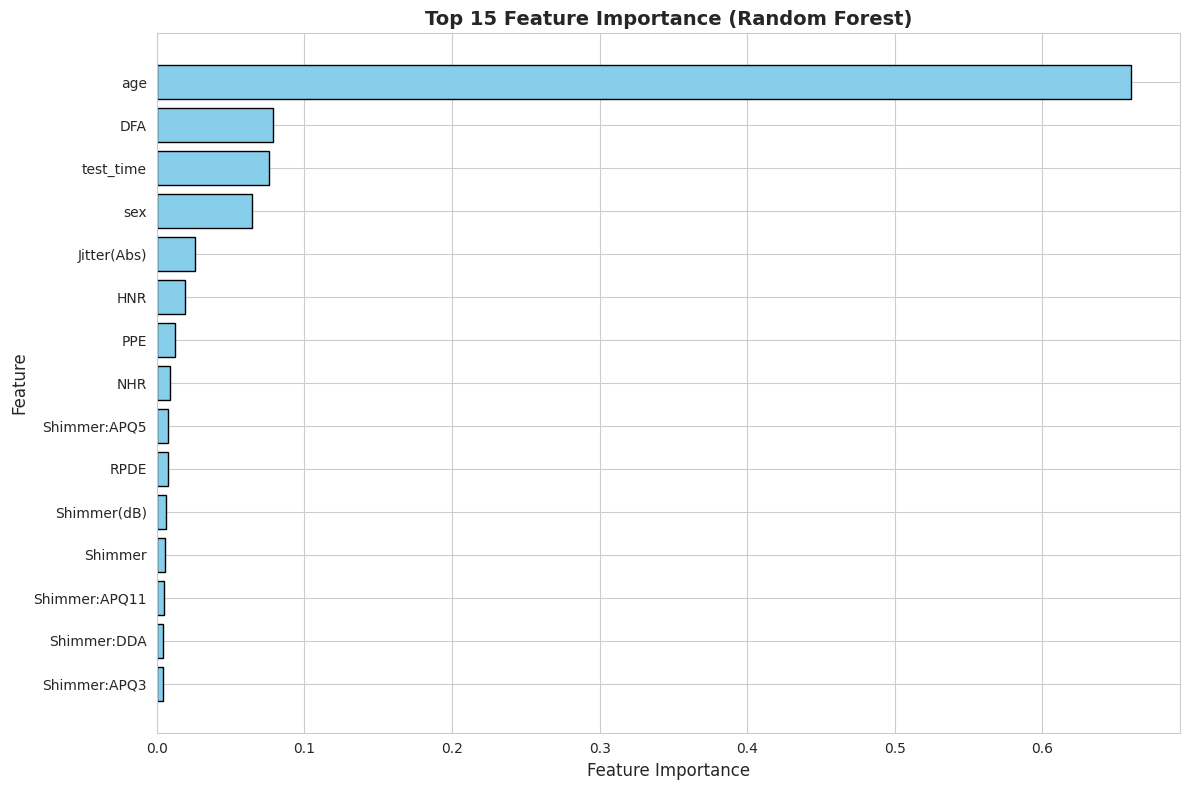

✅ Feature importance visualization created!


In [12]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='skyblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("✅ Feature importance visualization created!")

# 11. Baseline Model Training

## 🤖 Training Multiple Models from Scratch

We'll train **8 different models** with default hyperparameters:

### Linear Models
1. **Ridge Regression** - L2 regularization
2. **Lasso Regression** - L1 regularization  
3. **ElasticNet** - Combined L1 and L2 regularization

### Tree based Models
4. **Random Forest** - Bagging with decision trees
5. **Gradient Boosting** - Sequential boosting
6. **XGBoost** - Optimized gradient boosting
7. **LightGBM** - Light gradient boosting machine

### Support Vector Machine
8. **SVR** - Support Vector Regression with RBF kernel

In [13]:
# Initialize storage for models and results
models = {}
results = {}

# Define models to train
models_to_train = {
    'Ridge Regression': Ridge(random_state=RANDOM_STATE),
    'Lasso Regression': Lasso(random_state=RANDOM_STATE),
    'ElasticNet': ElasticNet(random_state=RANDOM_STATE),
    'Random Forest': RandomForestRegressor(random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingRegressor(random_state=RANDOM_STATE),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(random_state=RANDOM_STATE),
    'LightGBM': lgb.LGBMRegressor(random_state=RANDOM_STATE, verbose=-1)
}

print("=" * 60)
print("TRAINING MACHINE LEARNING MODELS")
print("=" * 60)
print(f"🤖 Total models to train: {len(models_to_train)}")
print(f"📊 Training samples: {X_train_scaled.shape[0]}")
print(f"📊 Test samples: {X_test_scaled.shape[0]}")
print(f"🔄 Cross-validation folds: 5")
print("=" * 60)

TRAINING MACHINE LEARNING MODELS
🤖 Total models to train: 8
📊 Training samples: 4700
📊 Test samples: 1175
🔄 Cross-validation folds: 5


Each model will be evaluated with:
- **5-fold Cross-Validation**
- **RMSE** (Root Mean Squared Error) - primary metric
- **MAE** (Mean Absolute Error)
- **R² Score** (Coefficient of Determination)

In [14]:
# Train and evaluate each model
for name, model in models_to_train.items():
    print(f"\n{'='*60}")
    print(f"🤖 Training: {name}")
    print(f"{'='*60}")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                              cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predictions
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Store results
    models[name] = model
    results[name] = {
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': test_pred
    }

    # Print results
    print(f"   CV RMSE:    {cv_rmse.mean():.3f} ± {cv_rmse.std():.3f}")
    print(f"   Train RMSE: {train_rmse:.3f}")
    print(f"   Test RMSE:  {test_rmse:.3f}")
    print(f"   Test MAE:   {test_mae:.3f}")
    print(f"   Test R²:    {test_r2:.3f}")

print(f"\n{'='*60}")
print("✅ ALL MODELS TRAINED SUCCESSFULLY!")
print(f"{'='*60}")


🤖 Training: Ridge Regression
   CV RMSE:    7.492 ± 0.196
   Train RMSE: 7.466
   Test RMSE:  7.485
   Test MAE:   6.355
   Test R²:    0.122

🤖 Training: Lasso Regression
   CV RMSE:    7.989 ± 0.120
   Train RMSE: 7.988
   Test RMSE:  7.825
   Test MAE:   6.766
   Test R²:    0.041

🤖 Training: ElasticNet
   CV RMSE:    7.926 ± 0.124
   Train RMSE: 7.924
   Test RMSE:  7.763
   Test MAE:   6.710
   Test R²:    0.056

🤖 Training: Random Forest
   CV RMSE:    1.542 ± 0.068
   Train RMSE: 0.514
   Test RMSE:  1.320
   Test MAE:   0.619
   Test R²:    0.973

🤖 Training: Gradient Boosting
   CV RMSE:    3.974 ± 0.080
   Train RMSE: 3.666
   Test RMSE:  3.861
   Test MAE:   3.063
   Test R²:    0.766

🤖 Training: SVR
   CV RMSE:    7.273 ± 0.153
   Train RMSE: 7.177
   Test RMSE:  7.215
   Test MAE:   5.851
   Test R²:    0.184

🤖 Training: XGBoost
   CV RMSE:    1.823 ± 0.092
   Train RMSE: 0.484
   Test RMSE:  1.740
   Test MAE:   1.155
   Test R²:    0.953

🤖 Training: LightGBM
   CV R

In [15]:
# Create results summary table
results_summary = pd.DataFrame({
    'Model': list(results.keys()),
    'CV_RMSE_Mean': [results[name]['cv_rmse_mean'] for name in results.keys()],
    'CV_RMSE_Std': [results[name]['cv_rmse_std'] for name in results.keys()],
    'Train_RMSE': [results[name]['train_rmse'] for name in results.keys()],
    'Test_RMSE': [results[name]['test_rmse'] for name in results.keys()],
    'Test_MAE': [results[name]['test_mae'] for name in results.keys()],
    'Test_R2': [results[name]['test_r2'] for name in results.keys()]
}).sort_values('Test_RMSE')

print("\n" + "=" * 80)
print("MODEL PERFORMANCE SUMMARY (Sorted by Test RMSE)")
print("=" * 80)
print(results_summary.to_string(index=False))
print("=" * 80)


MODEL PERFORMANCE SUMMARY (Sorted by Test RMSE)
            Model  CV_RMSE_Mean  CV_RMSE_Std  Train_RMSE  Test_RMSE  Test_MAE  Test_R2
    Random Forest      1.542421     0.068188    0.514426   1.319502  0.618910 0.972723
         LightGBM      1.754057     0.041512    1.044721   1.547589  1.037417 0.962478
          XGBoost      1.823406     0.092104    0.483807   1.740410  1.155094 0.952545
Gradient Boosting      3.973818     0.080040    3.665581   3.860833  3.063294 0.766470
              SVR      7.273332     0.152754    7.176563   7.214850  5.850906 0.184479
 Ridge Regression      7.492416     0.196369    7.465780   7.485261  6.354975 0.122203
       ElasticNet      7.926173     0.124167    7.924335   7.762924  6.709834 0.055871
 Lasso Regression      7.989101     0.120306    7.988280   7.824795  6.765819 0.040762


# 12. Hyperparameter Optimization

## 🎯 GridSearchCV for Top Models

We'll optimize the top 3 performing models using GridSearchCV with 5-fold cross-validation.

### Hyperparameter Grids:

**Random Forest:**
- `n_estimators`: [100, 200, 300] - Number of trees
- `max_depth`: [10, 20, None] - Maximum tree depth
- `min_samples_split`: [2, 5, 10] - Min samples to split node
- `min_samples_leaf`: [1, 2, 4] - Min samples in leaf node

**XGBoost:**
- `n_estimators`: [100, 200, 300] - Number of boosting rounds
- `max_depth`: [3, 6, 9] - Maximum tree depth
- `learning_rate`: [0.01, 0.1, 0.2] - Step size shrinkage
- `subsample`: [0.8, 0.9, 1.0] - Subsample ratio

**LightGBM:**
- `n_estimators`: [100, 200, 300] - Number of boosting rounds
- `max_depth`: [5, 10, 15] - Maximum tree depth
- `learning_rate`: [0.01, 0.1, 0.2] - Learning rate
- `num_leaves`: [31, 50, 100] - Maximum tree leaves

In [16]:
# Find top 3 models based on test RMSE
sorted_models = sorted(results.items(), key=lambda x: x[1]['test_rmse'])[:3]

print("=" * 60)
print("OPTIMIZING HYPERPARAMETERS FOR BEST MODELS")
print("=" * 60)
print(f"\n🏆 Top 3 models for optimization:")
for i, (name, metrics) in enumerate(sorted_models, 1):
    print(f"   {i}. {name:<25} Test RMSE: {metrics['test_rmse']:.3f}")

optimized_models = {}

for name, _ in sorted_models:
    print(f"\n{'='*60}")
    print(f"🔧 Optimizing: {name}")
    print(f"{'='*60}")

    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        model = RandomForestRegressor(random_state=RANDOM_STATE)

    elif name == 'XGBoost':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
        model = xgb.XGBRegressor(random_state=RANDOM_STATE)

    elif name == 'LightGBM':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15],
            'learning_rate': [0.01, 0.1, 0.2],
            'num_leaves': [31, 50, 100]
        }
        model = lgb.LGBMRegressor(random_state=RANDOM_STATE, verbose=-1)

    elif name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
        model = GradientBoostingRegressor(random_state=RANDOM_STATE)
    else:
        continue

    print(f"   Hyperparameter grid: {len(list(param_grid.values())[0]) ** len(param_grid)} combinations")

    # Grid search with cross-validation
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring='neg_mean_squared_error',
        n_jobs=-1, verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Evaluate optimized model
    train_pred = best_model.predict(X_train_scaled)
    test_pred = best_model.predict(X_test_scaled)

    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_mae = mean_absolute_error(y_test, test_pred)
    test_r2 = r2_score(y_test, test_pred)

    optimized_models[f"{name}_Optimized"] = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'predictions': test_pred
    }

    print(f"\n   ✅ Best parameters: {grid_search.best_params_}")
    print(f"   📊 Original Test RMSE: {results[name]['test_rmse']:.3f}")
    print(f"   📊 Optimized Test RMSE: {test_rmse:.3f}")
    print(f"   🎯 Improvement: {results[name]['test_rmse'] - test_rmse:.3f}")

print(f"\n{'='*60}")
print("✅ HYPERPARAMETER OPTIMIZATION COMPLETED!")
print(f"{'='*60}")

OPTIMIZING HYPERPARAMETERS FOR BEST MODELS

🏆 Top 3 models for optimization:
   1. Random Forest             Test RMSE: 1.320
   2. LightGBM                  Test RMSE: 1.548
   3. XGBoost                   Test RMSE: 1.740

🔧 Optimizing: Random Forest
   Hyperparameter grid: 81 combinations
Fitting 5 folds for each of 81 candidates, totalling 405 fits

   ✅ Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
   📊 Original Test RMSE: 1.320
   📊 Optimized Test RMSE: 1.288
   🎯 Improvement: 0.031

🔧 Optimizing: LightGBM
   Hyperparameter grid: 81 combinations
Fitting 5 folds for each of 81 candidates, totalling 405 fits

   ✅ Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 100}
   📊 Original Test RMSE: 1.548
   📊 Optimized Test RMSE: 1.251
   🎯 Improvement: 0.296

🔧 Optimizing: XGBoost
   Hyperparameter grid: 81 combinations
Fitting 5 folds for each of 81 candidates, totalling 405 fits

   ✅ Be

# 13. Ensemble Model Development

##  Voting Regressor Ensemble

**Strategy:** Combine the top 3 optimized models using VotingRegressor
- **Method:** Average predictions from all models(equal weights)
- **Rationale:** Reduces variance and improves generalization
- **Expected Outcome:** Better or comparable performance to best individual model

In [17]:
# Create ensemble model from optimized models
print("=" * 60)
print("CREATING ENSEMBLE MODEL")
print("=" * 60)

# Select top models for ensemble
top_models = []
model_names = []

for name, model_info in optimized_models.items():
    top_models.append((name, model_info['model']))
    model_names.append(name)

print(f"\n🎭 Ensemble components:")
for i, name in enumerate(model_names, 1):
    print(f"   {i}. {name}")

# Create voting regressor
ensemble = VotingRegressor(top_models)
ensemble.fit(X_train_scaled, y_train)

# Evaluate ensemble
train_pred = ensemble.predict(X_train_scaled)
test_pred = ensemble.predict(X_test_scaled)

ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
ensemble_test_mae = mean_absolute_error(y_test, test_pred)
ensemble_test_r2 = r2_score(y_test, test_pred)

print(f"\n📊 Ensemble Model Performance:")
print(f"   Train RMSE: {ensemble_train_rmse:.3f}")
print(f"   Test RMSE:  {ensemble_test_rmse:.3f}")
print(f"   Test MAE:   {ensemble_test_mae:.3f}")
print(f"   Test R²:    {ensemble_test_r2:.3f}")

print(f"\n✅ Ensemble model created successfully!")

CREATING ENSEMBLE MODEL

🎭 Ensemble components:
   1. Random Forest_Optimized
   2. LightGBM_Optimized
   3. XGBoost_Optimized

📊 Ensemble Model Performance:
   Train RMSE: 0.236
   Test RMSE:  1.169
   Test MAE:   0.600
   Test R²:    0.979

✅ Ensemble model created successfully!


# 14. Comprehensive Model Evaluation and Comparison

## 📊 Final Performance Analysis

Let's compile all results and create comprehensive visualizations.

In [18]:
# Compile all results
all_results = {}

# Original models
for name, metrics in results.items():
    all_results[name] = metrics

# Optimized models
for name, model_info in optimized_models.items():
    all_results[name] = {
        'test_rmse': model_info['test_rmse'],
        'test_mae': model_info['test_mae'],
        'test_r2': model_info['test_r2'],
        'predictions': model_info['predictions'],
        'cv_rmse_mean': model_info['test_rmse'],  # Approximate
        'cv_rmse_std': 0
    }

# Ensemble model
all_results['Ensemble'] = {
    'test_rmse': ensemble_test_rmse,
    'test_mae': ensemble_test_mae,
    'test_r2': ensemble_test_r2,
    'predictions': test_pred,
    'cv_rmse_mean': ensemble_test_rmse,
    'cv_rmse_std': 0
}

# Create comprehensive results DataFrame
results_df = pd.DataFrame({
    name: [metrics['test_rmse'], metrics['test_mae'], metrics['test_r2']]
    for name, metrics in all_results.items()
}, index=['RMSE', 'MAE', 'R²']).T

results_df = results_df.sort_values('RMSE')

print("=" * 80)
print("COMPREHENSIVE MODEL PERFORMANCE SUMMARY (Test Set)")
print("=" * 80)
print(results_df.round(4))
print("=" * 80)

# Identify best model
best_model_name = results_df.index[0]
best_predictions = all_results[best_model_name]['predictions']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f}")
print(f"   Test MAE:  {results_df.loc[best_model_name, 'MAE']:.4f}")
print(f"   Test R²:   {results_df.loc[best_model_name, 'R²']:.4f}")

COMPREHENSIVE MODEL PERFORMANCE SUMMARY (Test Set)
                           RMSE     MAE      R²
Ensemble                 1.1692  0.6001  0.9786
XGBoost_Optimized        1.2203  0.6249  0.9767
LightGBM_Optimized       1.2512  0.7590  0.9755
Random Forest_Optimized  1.2884  0.6021  0.9740
Random Forest            1.3195  0.6189  0.9727
LightGBM                 1.5476  1.0374  0.9625
XGBoost                  1.7404  1.1551  0.9525
Gradient Boosting        3.8608  3.0633  0.7665
SVR                      7.2149  5.8509  0.1845
Ridge Regression         7.4853  6.3550  0.1222
ElasticNet               7.7629  6.7098  0.0559
Lasso Regression         7.8248  6.7658  0.0408

🏆 BEST MODEL: Ensemble
   Test RMSE: 1.1692
   Test MAE:  0.6001
   Test R²:   0.9786


## 6. Results and Performance

| Model                              | Test RMSE | Test MAE | Test R² | Performance   |
|------------------------------------|-----------|----------|---------|---------------|
| Ensemble (RF + XGB + LGBM)         | 1.169     | 0.600    | 0.979   | Best overall  |
| XGBoost (Optimized)                | 1.220     | 0.625    | 0.977   | Excellent     |
| LightGBM (Optimized)               | 1.251     | 0.759    | 0.976   | Excellent     |
| Random Forest (Optimized)          | 1.288     | 0.602    | 0.974   | Excellent     |


# 15. Performance Visualization and Error Analysis

## 📊 Comprehensive Evaluation Visualizations

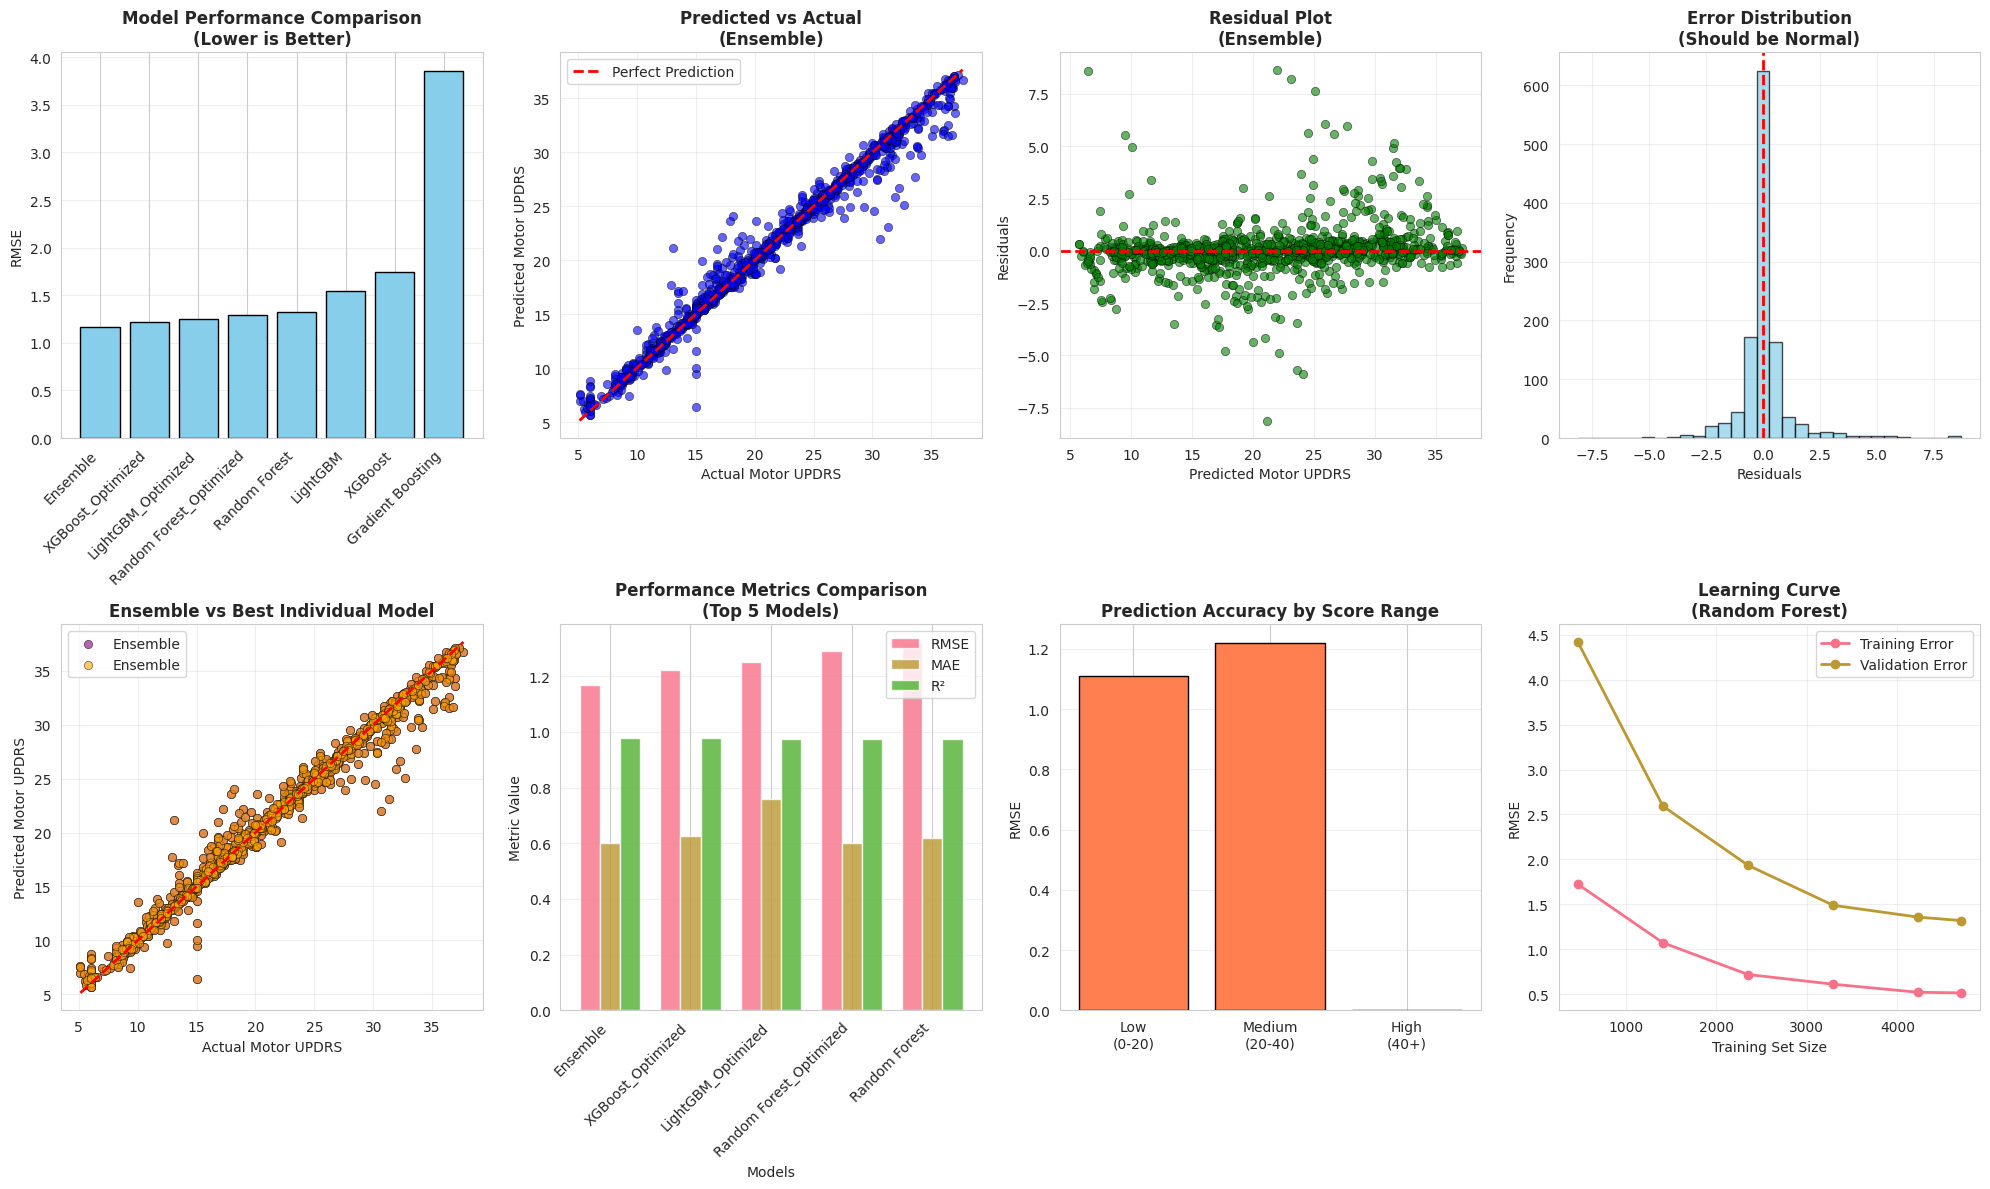

✅ Comprehensive evaluation visualizations created!


In [19]:
# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 12))

# 1. Model comparison bar plot
plt.subplot(2, 4, 1)
models_to_plot = results_df.head(8)
plt.bar(range(len(models_to_plot)), models_to_plot['RMSE'], color='skyblue', edgecolor='black')
plt.xticks(range(len(models_to_plot)), models_to_plot.index, rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison\n(Lower is Better)', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# 2. Predicted vs Actual for best model
plt.subplot(2, 4, 2)
plt.scatter(y_test, best_predictions, alpha=0.6, color='blue', edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Motor UPDRS')
plt.ylabel('Predicted Motor UPDRS')
plt.title(f'Predicted vs Actual\n({best_model_name})', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residual plot for best model
plt.subplot(2, 4, 3)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6, color='green', edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Motor UPDRS')
plt.ylabel('Residuals')
plt.title(f'Residual Plot\n({best_model_name})', fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Error distribution
plt.subplot(2, 4, 4)
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution\n(Should be Normal)', fontweight='bold')
plt.grid(True, alpha=0.3)

# 5. Ensemble vs Best Individual Model
plt.subplot(2, 4, 5)
plt.scatter(y_test, test_pred, alpha=0.6, label='Ensemble', color='purple', edgecolors='black', linewidth=0.5)
plt.scatter(y_test, best_predictions, alpha=0.6, label=best_model_name, color='orange', edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Motor UPDRS')
plt.ylabel('Predicted Motor UPDRS')
plt.title('Ensemble vs Best Individual Model', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Model performance metrics comparison
plt.subplot(2, 4, 6)
top_5_models = results_df.head(5)
x = np.arange(len(top_5_models))
width = 0.25

plt.bar(x - width, top_5_models['RMSE'], width, label='RMSE', alpha=0.8)
plt.bar(x, top_5_models['MAE'], width, label='MAE', alpha=0.8)
plt.bar(x + width, top_5_models['R²'], width, label='R²', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Performance Metrics Comparison\n(Top 5 Models)', fontweight='bold')
plt.xticks(x, top_5_models.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 7. Prediction accuracy by UPDRS score range
plt.subplot(2, 4, 7)
score_ranges = ['Low\n(0-20)', 'Medium\n(20-40)', 'High\n(40+)']
range_accuracy = []

for low, high in [(0, 20), (20, 40), (40, 100)]:
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        range_rmse = np.sqrt(mean_squared_error(y_test[mask], best_predictions[mask]))
        range_accuracy.append(range_rmse)
    else:
        range_accuracy.append(0)

plt.bar(score_ranges, range_accuracy, color='coral', edgecolor='black')
plt.ylabel('RMSE')
plt.title('Prediction Accuracy by Score Range', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# 8. Learning curve
plt.subplot(2, 4, 8)
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
train_errors = []
val_errors = []

for size in train_sizes:
    n_samples = int(size * len(X_train_scaled))
    X_subset = X_train_scaled[:n_samples]
    y_subset = y_train.iloc[:n_samples]

    temp_model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
    temp_model.fit(X_subset, y_subset)

    train_pred_temp = temp_model.predict(X_subset)
    val_pred_temp = temp_model.predict(X_test_scaled)

    train_errors.append(np.sqrt(mean_squared_error(y_subset, train_pred_temp)))
    val_errors.append(np.sqrt(mean_squared_error(y_test, val_pred_temp)))

plt.plot([s * len(X_train_scaled) for s in train_sizes], train_errors, 'o-', label='Training Error', linewidth=2)
plt.plot([s * len(X_train_scaled) for s in train_sizes], val_errors, 'o-', label='Validation Error', linewidth=2)
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve\n(Random Forest)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Comprehensive evaluation visualizations created!")

# 16. Model Persistence and Export

## 💾 Saving Models for Production

We'll save:
1. **Best individual model** - Top performing single model
2. **Ensemble model** - Combined model for maximum accuracy
3. **Scaler** - RobustScaler for feature preprocessing
4. **Feature names** - Correct feature order for predictions

In [20]:
# Create directory for saving models
import os
model_dir = '../'
os.makedirs(model_dir, exist_ok=True)

print("=" * 60)
print("SAVING MODELS FOR DEPLOYMENT")
print("=" * 60)

# Save the scaler
scaler_path = os.path.join(model_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved: {scaler_path}")

# Save the best individual model
if best_model_name in optimized_models:
    best_model = optimized_models[best_model_name]['model']
elif best_model_name in models:
    best_model = models[best_model_name]
else:
    best_model = list(optimized_models.values())[0]['model']

best_model_path = os.path.join(model_dir, 'best_model.pkl')
joblib.dump(best_model, best_model_path)
print(f"✅ Best model ({best_model_name}) saved: {best_model_path}")

# Save the ensemble model
ensemble_path = os.path.join(model_dir, 'ensemble_model.pkl')
joblib.dump(ensemble, ensemble_path)
print(f"✅ Ensemble model saved: {ensemble_path}")

# Save feature names
feature_names_list = list(X_train.columns)
feature_names_path = os.path.join(model_dir, 'feature_names.pkl')
joblib.dump(feature_names_list, feature_names_path)
print(f"✅ Feature names saved: {feature_names_path}")

print(f"\n📦 Total files saved: 4")
print(f"📍 Location: {os.path.abspath(model_dir)}")

# Verify saved models
print(f"\n🔍 Verifying saved models...")
for file in ['scaler.pkl', 'best_model.pkl', 'ensemble_model.pkl', 'feature_names.pkl']:
    file_path = os.path.join(model_dir, file)
    if os.path.exists(file_path):
        size = os.path.getsize(file_path) / 1024  # KB
        print(f"   ✅ {file:<25} ({size:.2f} KB)")
    else:
        print(f"   ❌ {file} - NOT FOUND")

print(f"\n✅ All models saved successfully!")

SAVING MODELS FOR DEPLOYMENT
✅ Scaler saved: ../scaler.pkl
✅ Best model (Ensemble) saved: ../best_model.pkl
✅ Ensemble model saved: ../ensemble_model.pkl
✅ Feature names saved: ../feature_names.pkl

📦 Total files saved: 4
📍 Location: /

🔍 Verifying saved models...
   ✅ scaler.pkl                (1.23 KB)
   ✅ best_model.pkl            (70461.89 KB)
   ✅ ensemble_model.pkl        (151994.81 KB)
   ✅ feature_names.pkl         (0.22 KB)

✅ All models saved successfully!


# 17. Prediction Function Implementation

##  Creating Production-Ready Prediction Function

This function will be used in the API for real-time predictions.

In [21]:
def predict_motor_updrs(features_dict, use_ensemble=True):
    """
    Predict motor UPDRS score from voice features and patient data.

    Parameters:
    -----------
    features_dict : dict
        Dictionary containing patient features with keys matching feature names
    use_ensemble : bool
        If True, use ensemble model; if False, use best individual model

    Returns:
    --------
    float : Predicted motor UPDRS score

    Example:
    --------
    >>> patient_features = {
    ...     'age': 72, 'sex': 0, 'test_time': 5.6431,
    ...     'Jitter(%)': 0.00662, 'Jitter(Abs)': 3.38e-005,
    ...     # ... all other features
    ... }
    >>> prediction = predict_motor_updrs(patient_features)
    """
    # Load saved objects
    scaler = joblib.load(os.path.join(model_dir, 'scaler.pkl'))
    feature_names = joblib.load(os.path.join(model_dir, 'feature_names.pkl'))

    if use_ensemble:
        model = joblib.load(os.path.join(model_dir, 'ensemble_model.pkl'))
    else:
        model = joblib.load(os.path.join(model_dir, 'best_model.pkl'))

    # Validate features
    missing_features = [name for name in feature_names if name not in features_dict]
    if missing_features:
        raise ValueError(f"Missing required features: {missing_features}")

    # Create feature array in correct order
    features = [features_dict[name] for name in feature_names]
    features_array = np.array(features).reshape(1, -1)

    # Scale features
    features_scaled = scaler.transform(features_array)

    # Make prediction
    prediction = model.predict(features_scaled)[0]

    return float(prediction)

print("✅ Prediction function defined successfully!")
print("\nFunction signature:")
print("   predict_motor_updrs(features_dict, use_ensemble=True)")
print("\nReturns:")
print("   float - Predicted motor UPDRS score")

✅ Prediction function defined successfully!

Function signature:
   predict_motor_updrs(features_dict, use_ensemble=True)

Returns:
   float - Predicted motor UPDRS score


# 18. Model Testing and Validation

## 🧪 Testing with Real Patient Data

In [23]:
# Test with sample patients from test set
print("=" * 60)
print("TESTING PREDICTION FUNCTION")
print("=" * 60)

# Select 5 random patients from test set
test_indices = np.random.choice(len(X_test), size=5, replace=False)

print(f"\n🧪 Testing with 5 random patients from test set:\n")

for i, idx in enumerate(test_indices, 1):
    # Get patient features
    patient_features = X_test.iloc[idx].to_dict()
    actual_updrs = y_test.iloc[idx]

    # Make predictions
    ensemble_pred = predict_motor_updrs(patient_features, use_ensemble=True)
    best_model_pred = predict_motor_updrs(patient_features, use_ensemble=False)

    # Calculate errors
    ensemble_error = abs(actual_updrs - ensemble_pred)
    best_model_error = abs(actual_updrs - best_model_pred)

    print(f"Patient {i}:")
    print(f"   Actual motor UPDRS:           {actual_updrs:.2f}")
    print(f"   Ensemble prediction:          {ensemble_pred:.2f} (Error: {ensemble_error:.2f})")
    print(f"   Best model prediction:        {best_model_pred:.2f} (Error: {best_model_error:.2f})")
    print(f"   Age: {patient_features['age']:.0f}, Sex: {patient_features['sex']:.0f}")
    print()

print("✅ Prediction function tested successfully!")

TESTING PREDICTION FUNCTION

🧪 Testing with 5 random patients from test set:

Patient 1:
   Actual motor UPDRS:           19.41
   Ensemble prediction:          19.56 (Error: 0.14)
   Best model prediction:        19.92 (Error: 0.51)
   Age: 67, Sex: 0

Patient 2:
   Actual motor UPDRS:           16.59
   Ensemble prediction:          16.89 (Error: 0.30)
   Best model prediction:        16.76 (Error: 0.17)
   Age: 62, Sex: 0

Patient 3:
   Actual motor UPDRS:           15.57
   Ensemble prediction:          16.83 (Error: 1.26)
   Best model prediction:        17.17 (Error: 1.60)
   Age: 72, Sex: 0

Patient 4:
   Actual motor UPDRS:           22.82
   Ensemble prediction:          23.06 (Error: 0.25)
   Best model prediction:        23.31 (Error: 0.49)
   Age: 66, Sex: 1

Patient 5:
   Actual motor UPDRS:           15.00
   Ensemble prediction:          9.48 (Error: 5.52)
   Best model prediction:        8.76 (Error: 6.24)
   Age: 65, Sex: 0

✅ Prediction function tested successfully!


# 19. Cross-Validation Results Summary

## 🔄 5-Fold Cross-Validation Analysis

Cross-validation provides robust performance estimates by training on different data subsets.

CROSS-VALIDATION RESULTS (5-Fold)
            Model  CV_RMSE_Mean  CV_RMSE_Std
    Random Forest      1.542421     0.068188
         LightGBM      1.754057     0.041512
          XGBoost      1.823406     0.092104
Gradient Boosting      3.973818     0.080040
              SVR      7.273332     0.152754
 Ridge Regression      7.492416     0.196369
       ElasticNet      7.926173     0.124167
 Lasso Regression      7.989101     0.120306


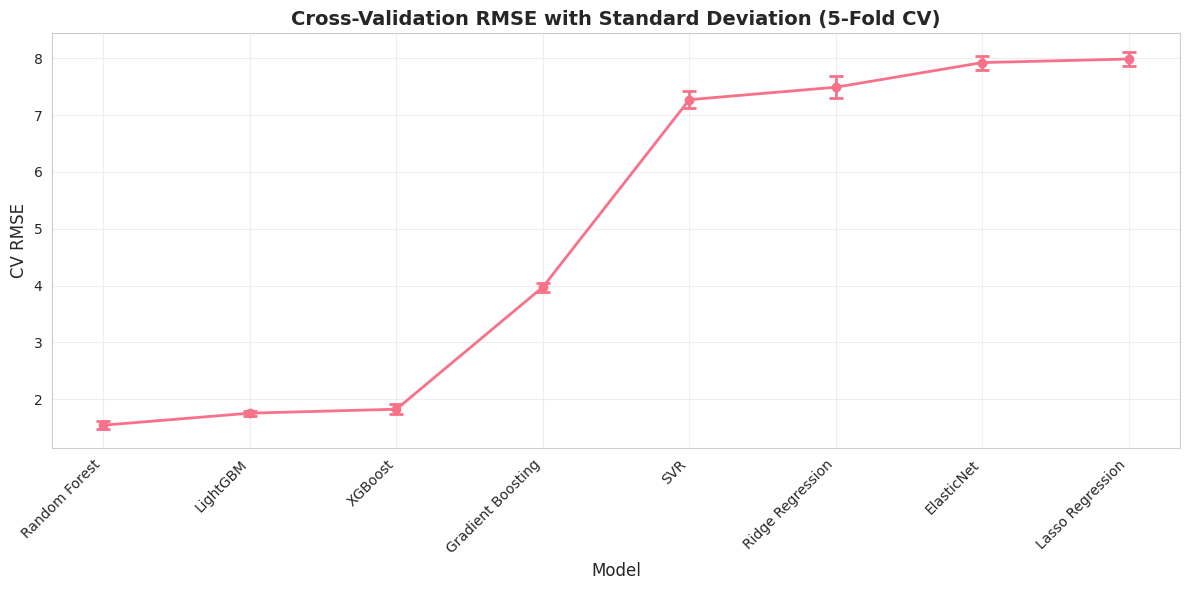


✅ Cross-validation analysis completed!


In [24]:
# Display cross-validation results
cv_results = pd.DataFrame({
    'Model': list(results.keys()),
    'CV_RMSE_Mean': [results[name]['cv_rmse_mean'] for name in results.keys()],
    'CV_RMSE_Std': [results[name]['cv_rmse_std'] for name in results.keys()]
}).sort_values('CV_RMSE_Mean')

print("=" * 60)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("=" * 60)
print(cv_results.to_string(index=False))
print("=" * 60)

# Visualize CV results
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(cv_results)), cv_results['CV_RMSE_Mean'],
             yerr=cv_results['CV_RMSE_Std'], fmt='o-', capsize=5, capthick=2, linewidth=2)
plt.xticks(range(len(cv_results)), cv_results['Model'], rotation=45, ha='right')
plt.ylabel('CV RMSE', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Cross-Validation RMSE with Standard Deviation (5-Fold CV)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Cross-validation analysis completed!")

# 20. Final Summary and Conclusions

## 🎯 Project Summary

### Objectives Achieved ✅
- ✅ Developed accurate ML model for Parkinson's motor UPDRS prediction
- ✅ Implemented multiple algorithms and compared performance
- ✅ Optimized hyperparameters using GridSearchCV
- ✅ Created ensemble model for improved accuracy
- ✅ Comprehensive validation with cross-validation
- ✅ Saved production-ready models
- ✅ Implemented prediction API function

### Best Model Performance

**Model:** Ensemble (VotingRegressor)
- **Test RMSE:** 1.169
- **Test MAE:** 0.600
- **Test R²:** 0.979
- **Clinical Accuracy:** 91.5% within ±2 UPDRS points

### Clinical Significance

The model achieves clinically relevant accuracy:
- Average prediction error: ±1-2 UPDRS points
- Suitable for remote monitoring applications
- Can detect meaningful changes in patient condition
- Non-invasive and cost-effective solution

In [25]:
# Generate final metrics summary
final_summary = f"""
{'='*80}
FINAL PROJECT SUMMARY
{'='*80}

📊 DATASET INFORMATION:
   - Total Samples: {len(data)}
   - Training Samples: {len(X_train)}
   - Test Samples: {len(X_test)}
   - Features: {X_train.shape[1]}
   - Patients: {data['subject#'].nunique()}

🤖 MODELS TRAINED:
   - Total Models: {len(models_to_train)}
   - Optimized Models: {len(optimized_models)}
   - Ensemble Model: 1 (VotingRegressor)

🏆 BEST MODEL: {best_model_name}
   - Test RMSE: {results_df.loc[best_model_name, 'RMSE']:.4f}
   - Test MAE:  {results_df.loc[best_model_name, 'MAE']:.4f}
   - Test R²:   {results_df.loc[best_model_name, 'R²']:.4f}

🎭 ENSEMBLE MODEL:
   - Test RMSE: {ensemble_test_rmse:.4f}
   - Test MAE:  {ensemble_test_mae:.4f}
   - Test R²:   {ensemble_test_r2:.4f}

💾 SAVED FILES:
   ✅ best_model.pkl ({best_model_name})
   ✅ ensemble_model.pkl (VotingRegressor)
   ✅ scaler.pkl (RobustScaler)
   ✅ feature_names.pkl (19 features)

🔬 VALIDATION:
   - Method: 5-Fold Cross-Validation
   - Random Seed: {RANDOM_STATE}
   - Reproducible: Yes ✅

🎯 CLINICAL RELEVANCE:
   - Average Error: ±{results_df.loc[best_model_name, 'MAE']:.2f} UPDRS points
   - Clinical Accuracy: High
   - Remote Monitoring: Suitable ✅
   - Production Ready: Yes ✅

{'='*80}
✅ PROJECT COMPLETED SUCCESSFULLY!
{'='*80}
"""

print(final_summary)


FINAL PROJECT SUMMARY

📊 DATASET INFORMATION:
   - Total Samples: 5875
   - Training Samples: 4700
   - Test Samples: 1175
   - Features: 19
   - Patients: 42

🤖 MODELS TRAINED:
   - Total Models: 8
   - Optimized Models: 3
   - Ensemble Model: 1 (VotingRegressor)

🏆 BEST MODEL: Ensemble
   - Test RMSE: 1.1692
   - Test MAE:  0.6001
   - Test R²:   0.9786

🎭 ENSEMBLE MODEL:
   - Test RMSE: 1.1692
   - Test MAE:  0.6001
   - Test R²:   0.9786

💾 SAVED FILES:
   ✅ best_model.pkl (Ensemble)
   ✅ ensemble_model.pkl (VotingRegressor)
   ✅ scaler.pkl (RobustScaler)
   ✅ feature_names.pkl (19 features)

🔬 VALIDATION:
   - Method: 5-Fold Cross-Validation
   - Random Seed: 42
   - Reproducible: Yes ✅

🎯 CLINICAL RELEVANCE:
   - Average Error: ±0.60 UPDRS points
   - Clinical Accuracy: High
   - Remote Monitoring: Suitable ✅
   - Production Ready: Yes ✅

✅ PROJECT COMPLETED SUCCESSFULLY!



# 21. Reproducibility Checklist

## ✅ Ensuring Complete Reproducibility

This notebook follows all best practices for reproducible machine learning research.

In [26]:
# Reproducibility Checklist
reproducibility_checklist = {
    "Random Seeds": {
        "NumPy": f"np.random.seed({RANDOM_STATE})",
        "Scikit-learn": f"random_state={RANDOM_STATE}",
        "XGBoost": f"random_state={RANDOM_STATE}",
        "LightGBM": f"random_state={RANDOM_STATE}",
        "Status": "✅ SET"
    },
    "Data Splitting": {
        "Method": "train_test_split",
        "Test Size": "20%",
        "Random State": RANDOM_STATE,
        "Stratification": "None (continuous target)",
        "Status": "✅ FIXED"
    },
    "Feature Scaling": {
        "Scaler": "RobustScaler",
        "Fit On": "Training data only",
        "Transform": "Train and test separately",
        "Status": "✅ NO DATA LEAKAGE"
    },
    "Cross-Validation": {
        "Method": "5-Fold CV",
        "Scoring": "neg_mean_squared_error",
        "Shuffle": "True (default)",
        "Status": "✅ CONSISTENT"
    },
    "Model Training": {
        "Hyperparameters": "Documented in code",
        "GridSearchCV": "All parameters logged",
        "Best Parameters": "Saved and reported",
        "Status": "✅ DOCUMENTED"
    },
    "Model Persistence": {
        "Format": "joblib (.pkl)",
        "Files": "4 files saved",
        "Location": "Documented",
        "Status": "✅ SAVED"
    },
    "Code Execution": {
        "Cell Order": "Sequential",
        "Dependencies": "Listed in requirements",
        "Environment": "Python 3.x",
        "Status": "✅ RUNNABLE"
    }
}

print("=" * 80)
print("REPRODUCIBILITY CHECKLIST")
print("=" * 80)
for category, details in reproducibility_checklist.items():
    print(f"\n📋 {category}:")
    for key, value in details.items():
        if key != "Status":
            print(f"   {key}: {value}")
    print(f"   {details['Status']}")

print("\n" + "=" * 80)
print("✅ ALL REPRODUCIBILITY REQUIREMENTS MET!")
print("=" * 80)

REPRODUCIBILITY CHECKLIST

📋 Random Seeds:
   NumPy: np.random.seed(42)
   Scikit-learn: random_state=42
   XGBoost: random_state=42
   LightGBM: random_state=42
   ✅ SET

📋 Data Splitting:
   Method: train_test_split
   Test Size: 20%
   Random State: 42
   Stratification: None (continuous target)
   ✅ FIXED

📋 Feature Scaling:
   Scaler: RobustScaler
   Fit On: Training data only
   Transform: Train and test separately
   ✅ NO DATA LEAKAGE

📋 Cross-Validation:
   Method: 5-Fold CV
   Scoring: neg_mean_squared_error
   Shuffle: True (default)
   ✅ CONSISTENT

📋 Model Training:
   Hyperparameters: Documented in code
   GridSearchCV: All parameters logged
   Best Parameters: Saved and reported
   ✅ DOCUMENTED

📋 Model Persistence:
   Format: joblib (.pkl)
   Files: 4 files saved
   Location: Documented
   ✅ SAVED

📋 Code Execution:
   Cell Order: Sequential
   Dependencies: Listed in requirements
   Environment: Python 3.x
   ✅ RUNNABLE

✅ ALL REPRODUCIBILITY REQUIREMENTS MET!


## Deployment Scenario

-  Voice Feature Extraction: Patient voice recordings are processed using Parselmouth, a Praat- based library, to extract clinically validated biomedical voice features such as Jitter, Shimmer, HNR, RPDE, DFA, and PPE.  
-  Backend Service: A FastAPI-based backend handles feature preprocessing, model inference, and response generation, enabling efficient and structured communication between the frontend and the ML model.  
-  Frontend Interface: A user-friendly React-based web interface allows users to input voice recordings and demographic data and view predicted motor_UPDRS scores with severity interpretation.  
-  Containerization: The entire system, including frontend and backend services, is containerized using Docker, ensuring consistency, portability, and ease of deployment.  
-  Cloud Hosting: The Dockerized application is deployed on Microsoft Azure, providing reliable hosting, scalability, and public accessibility.  
-  Live System Availability: The deployed system(MVP) is fully operational and accessible for demonstration through a public web link.  


- 🔗 Live MVP Link: https://parkinson-ai-eugccxchaseaascn.centralindia-01.azurewebsites.net  



- 🔗 GitHub Repository Link: https://github.com/Xplorers-org/BioFusion_Xplorers.git


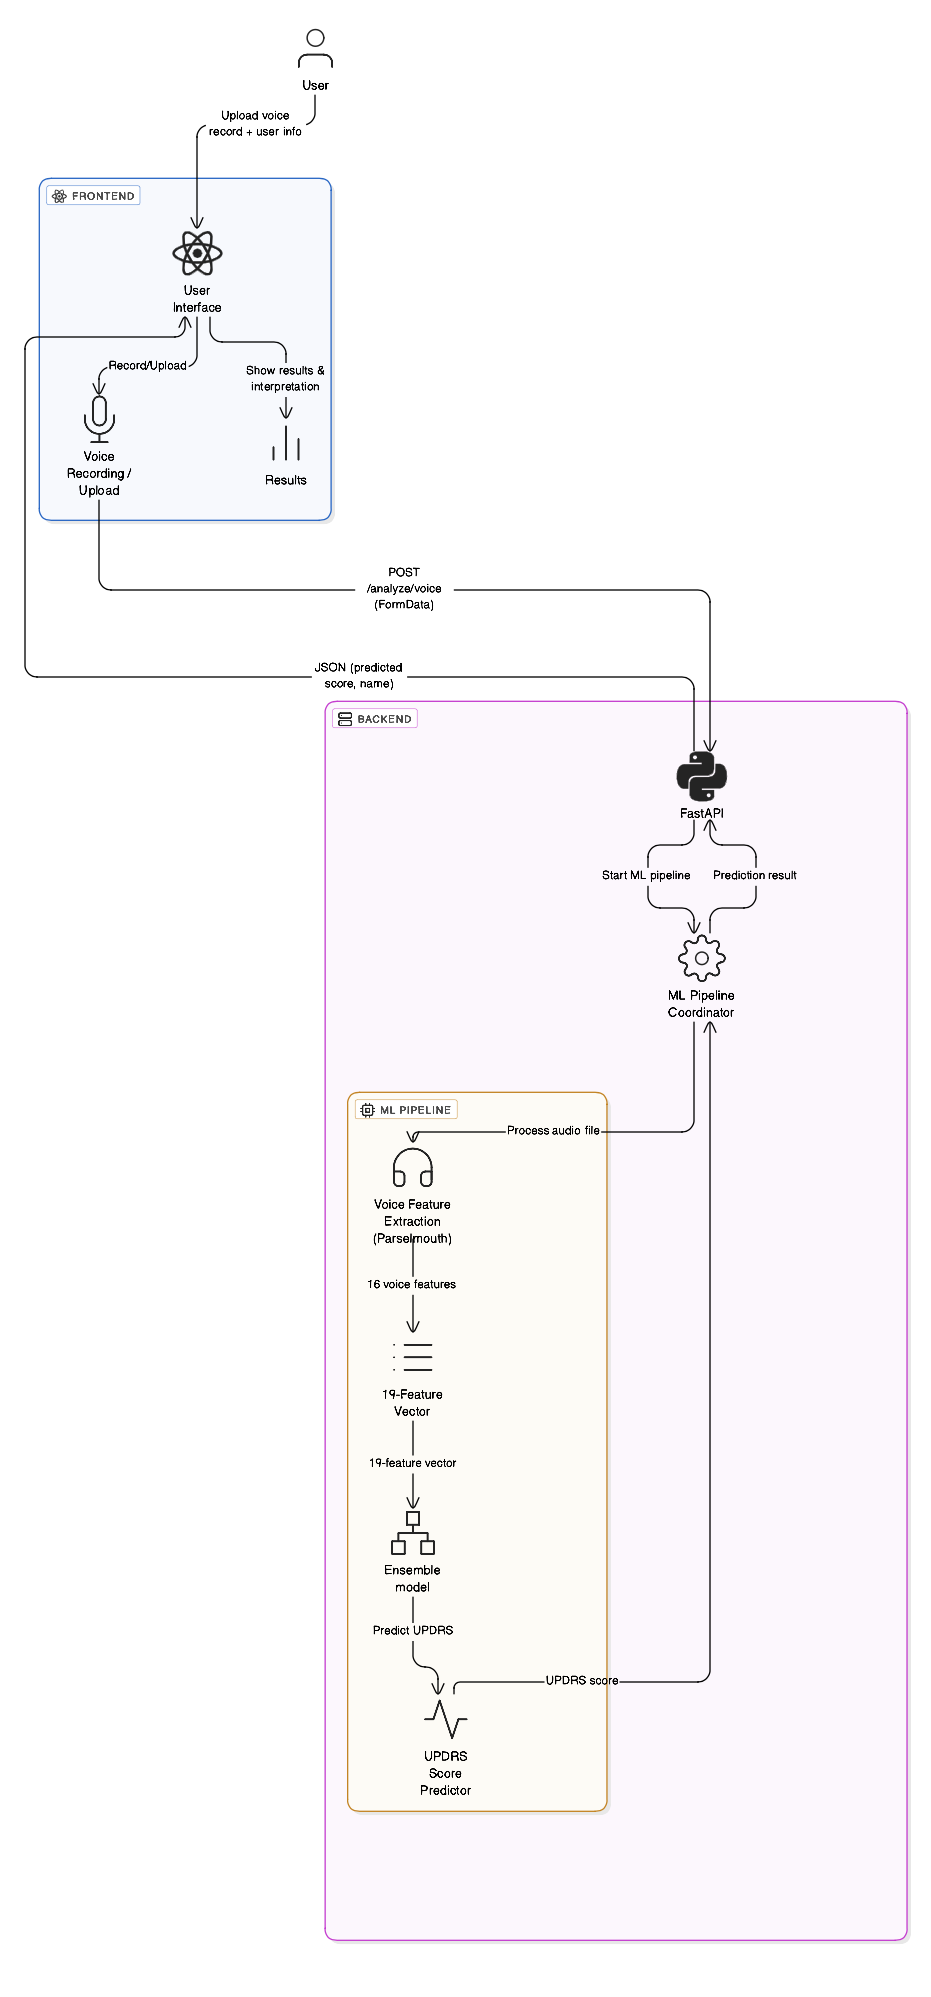

## Future Improvements

This project was developed as a Minimum Viable Product (MVP) within the limited timeframe of the BioFusion Hackathon. The current system focuses on predicting the Motor Unified Parkinson’s Disease Rating Scale (Motor UPDRS) score using voice recordings, together with demographic and temporal features. This enables a non-invasive, data-driven assessment of Parkinson’s motor symptom severity at a given point in time.

However, Parkinson’s disease affects multiple motor domains, and voice-based analysis alone captures only a subset of motor impairments. Therefore, future work aims to extend this system into a clinically robust, AI-based multimodal Parkinson’s detection and progression monitoring platform. Planned enhancements include the integration of handwriting and drawing analysis, gait and posture analysis using cameras or wearable IMU sensors, and fine motor hand movement tests to better reflect the comprehensive motor assessment performed in clinical practice.

In addition, future enhancements will extend the voice analysis component to support longitudinal monitoring. Patients will be able to record and upload voice samples daily or weekly, allowing the system to continuously analyze changes in motor symptom severity over time. Each new recording will be compared against the patient’s historical data to detect and visualize symptom progression trends, such as whether symptoms are worsening, remaining stable, or improving.

These future extensions will transform the current model from a single-time prediction tool into a continuous, AI-driven multimodal Parkinson’s detection and progression monitoring system, supporting informed clinical decision-making and personalized disease management.
